In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

## Preprocessing

In [2]:
dir_path = "/workspaces/gorillatracker/datasets/splits/-workspaces-gorillatracker-data-ground_truth-cxl_all-face_images-kfold-actual_openset-seed-42-trainval-80-test-20-k-5"

In [3]:
dirs = os.listdir(dir_path)
print(dirs)

['fold-2', 'fold-3', 'fold-1', 'fold-0', 'fold-4', 'test']


In [4]:
#create a dataframe for each directory
df: list[pd.DataFrame] = []

for i, d in enumerate(dirs):
    data = []
    solitary_data = 0
    # Extract data from filenames
    for filename in os.listdir(os.path.join(dir_path, d)):
        parts = filename.split("_")
        if len(parts) >= 4:
            id_, camid, date, id2 = parts[:4]
            solitary = False
            if(len(id_) != 4):  # if != 4, then the gorilla is a solitary one without a group
                # print(f"Solitary in {filename}")
                solitary_data += 1
                solitary = True
            Groupid = id_[:2] if not solitary else "SOLITARY"
            id_ = id_[2:] if not solitary else "".join(filter(str.isdigit, id_))
            id2 = id2[:4]
            id2 = "".join(filter(str.isdigit, id2)) # remove non-numeric characters
            date = dt.datetime.strptime(date, "%Y%m%d").date()
            data.append((Groupid, id_, camid, date, id2, f"{dir_path}/{d}/{filename}"))
        else:
            print(f"Invalid filename {filename}")
            
    # Create a DataFrame
    df.append(pd.DataFrame(data, columns=["GROUP", "ID", "CAM", "DATE", "CLIP_ID", "FILENAME"]))
    print(f"Directory {d} had {solitary_data} images of solitary gorillas with no group")

Directory fold-2 had 2 images of solitary gorillas with no group
Directory fold-3 had 50 images of solitary gorillas with no group
Directory fold-1 had 0 images of solitary gorillas with no group
Directory fold-0 had 0 images of solitary gorillas with no group
Directory fold-4 had 5 images of solitary gorillas with no group
Directory test had 1 images of solitary gorillas with no group


In [5]:
print(df[0].head())

      GROUP  ID   CAM        DATE CLIP_ID  \
0        JZ  01  R508  2021-05-04     242   
1  SOLITARY  92  R030  2021-09-28     118   
2        RC  21  R106  2022-10-17     081   
3        GA  03  R224  2020-06-08     134   
4        HU  23  R198  2020-02-11     066   

                                            FILENAME  
0  /workspaces/gorillatracker/datasets/splits/-wo...  
1  /workspaces/gorillatracker/datasets/splits/-wo...  
2  /workspaces/gorillatracker/datasets/splits/-wo...  
3  /workspaces/gorillatracker/datasets/splits/-wo...  
4  /workspaces/gorillatracker/datasets/splits/-wo...  


## Plot the Number of Videos per Individual

In [6]:
for i, d in enumerate(dirs):
    print(f"{d}:")
    print(f"\t Images: {df[i].shape[0]}")
    print(f"\t Individuals: {df[i].groupby(['GROUP', 'ID']).ngroups}")
    print(f"\t Groups: {df[i]['GROUP'].nunique()}")
    print(f"\t Cameras: {df[i]['CAM'].nunique()}")
    print(f"\t Days: {df[i]['DATE'].nunique()}")
    print(f"\t DateRange: {df[i]['DATE'].min()} - {df[i]['DATE'].max()}")
    print(f"\t Video_clips: {df[i].groupby(['CAM', 'DATE', 'CLIP_ID']).ngroups}")
    print(f"\t Videos: {df[i].groupby(['CAM', 'DATE']).ngroups}")


fold-2:
	 Images: 224
	 Individuals: 20
	 Groups: 14
	 Cameras: 13
	 Days: 35
	 DateRange: 2019-10-12 - 2023-09-17
	 Video_clips: 85
	 Videos: 36
fold-3:
	 Images: 224
	 Individuals: 20
	 Groups: 16
	 Cameras: 14
	 Days: 31
	 DateRange: 2019-07-27 - 2023-07-18
	 Video_clips: 88
	 Videos: 33
fold-1:
	 Images: 225
	 Individuals: 20
	 Groups: 11
	 Cameras: 11
	 Days: 35
	 DateRange: 2019-07-27 - 2023-09-13
	 Video_clips: 87
	 Videos: 36
fold-0:
	 Images: 225
	 Individuals: 20
	 Groups: 10
	 Cameras: 11
	 Days: 25
	 DateRange: 2019-03-14 - 2023-07-18
	 Video_clips: 87
	 Videos: 27
fold-4:
	 Images: 224
	 Individuals: 20
	 Groups: 15
	 Cameras: 16
	 Days: 33
	 DateRange: 2018-12-02 - 2023-05-20
	 Video_clips: 91
	 Videos: 34
test:
	 Images: 206
	 Individuals: 30
	 Groups: 16
	 Cameras: 18
	 Days: 43
	 DateRange: 2018-10-03 - 2023-09-13
	 Video_clips: 85
	 Videos: 43


In [7]:
df_combined = pd.concat(df)
print("Combined:")
print(f"\t Images: {len(df_combined)}")
print(f"\t Individuals: {df_combined.groupby(['GROUP', 'ID']).ngroups}")
print(f"\t Groups: {df_combined['GROUP'].nunique()}")
print(f"\t Cameras: {df_combined['CAM'].nunique()}")
print(f"\t Days: {df_combined['DATE'].nunique()}")
print(f"\t DateRange: {df_combined['DATE'].min()} - {df_combined['DATE'].max()}")
print(f"\t Video_clips: {df_combined.groupby(['CAM', 'DATE', 'CLIP_ID']).ngroups}")
print(f"\t Videos: {df_combined.groupby(['CAM', 'DATE']).ngroups}")

Combined:
	 Images: 1328
	 Individuals: 130
	 Groups: 26
	 Cameras: 26
	 Days: 115
	 DateRange: 2018-10-03 - 2023-09-17
	 Video_clips: 506
	 Videos: 128


## Video Clip Analysis

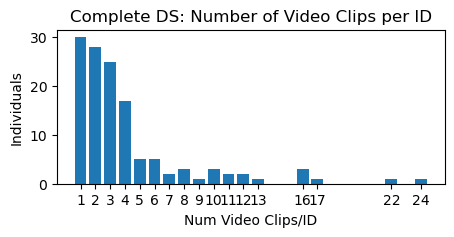

In [8]:
unique_videos = df_combined.drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE", "CLIP_ID"])
videos_per_id = unique_videos.groupby(["GROUP", "ID"]).size()
video_count_distribution = videos_per_id.value_counts().sort_index()

plt.figure(figsize=(5, 2))
plt.bar(video_count_distribution.index, video_count_distribution.values)
plt.xlabel("Num Video Clips/ID")
plt.ylabel("Individuals")
plt.title("Complete DS: Number of Video Clips per ID")
plt.xticks(video_count_distribution.index)
plt.show()

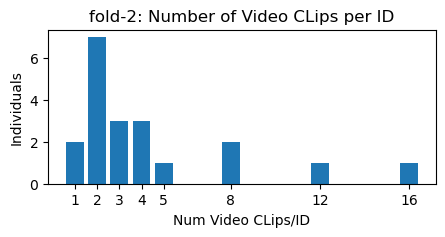

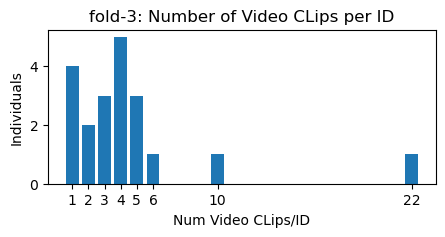

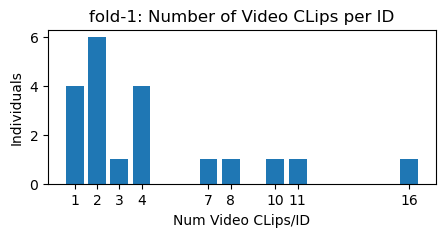

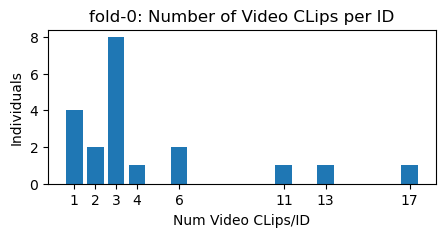

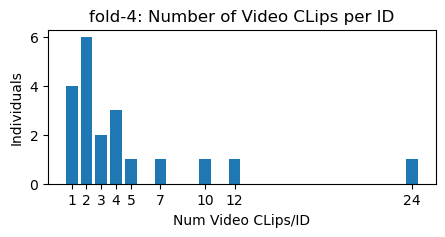

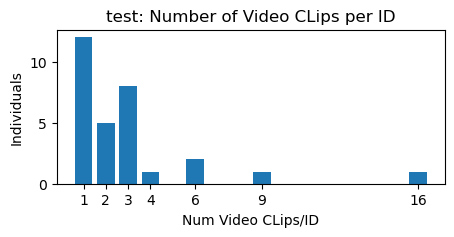

In [9]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE", "CLIP_ID"])
    videos_per_id = unique_videos.groupby(["GROUP", "ID"]).size()
    video_count_distribution = videos_per_id.value_counts().sort_index()
    plt.figure(figsize=(5, 2))
    plt.bar(video_count_distribution.index, video_count_distribution.values)
    plt.xlabel("Num Video CLips/ID")
    plt.ylabel("Individuals")
    plt.title(f"{d}: Number of Video CLips per ID")
    plt.xticks(video_count_distribution.index)
    plt.show()

## Video Count Analysis

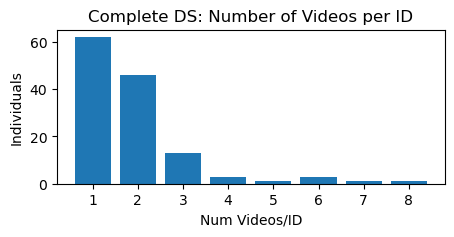

In [10]:
unique_videos = df_combined.drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE"])
videos_per_id = unique_videos.groupby(["GROUP", "ID"]).size()
video_count_distribution = videos_per_id.value_counts().sort_index()

plt.figure(figsize=(5, 2))
plt.bar(video_count_distribution.index, video_count_distribution.values)
plt.xlabel("Num Videos/ID")
plt.ylabel("Individuals")
plt.title("Complete DS: Number of Videos per ID")
plt.xticks(video_count_distribution.index)
plt.show()

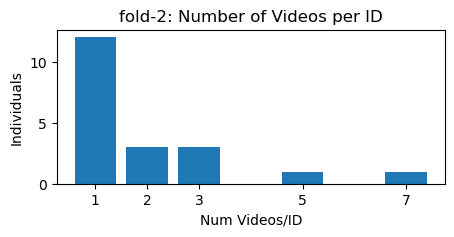

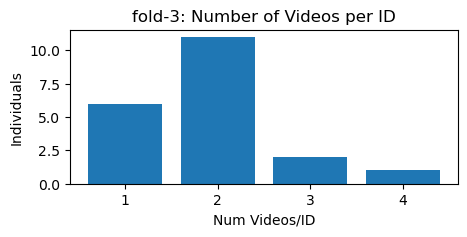

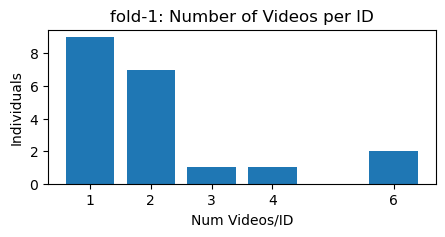

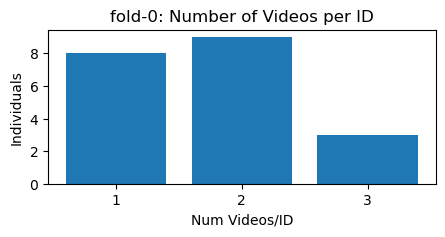

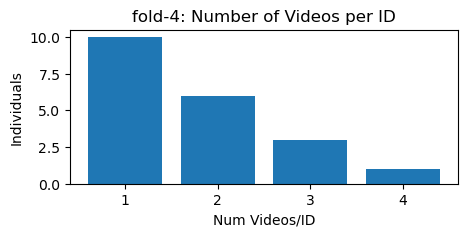

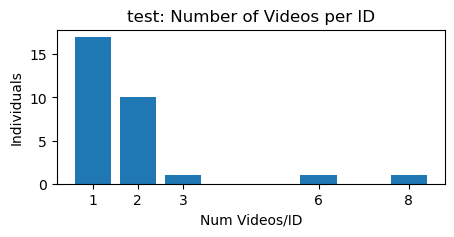

In [11]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE"])
    videos_per_id = unique_videos.groupby(["GROUP", "ID"]).size()
    video_count_distribution = videos_per_id.value_counts().sort_index()
    plt.figure(figsize=(5, 2))
    plt.bar(video_count_distribution.index, video_count_distribution.values)
    plt.xlabel("Num Videos/ID")
    plt.ylabel("Individuals")
    plt.title(f"{d}: Number of Videos per ID")
    plt.xticks(video_count_distribution.index)
    plt.show()


## Number of Images of Individuals with at least 2 Videos

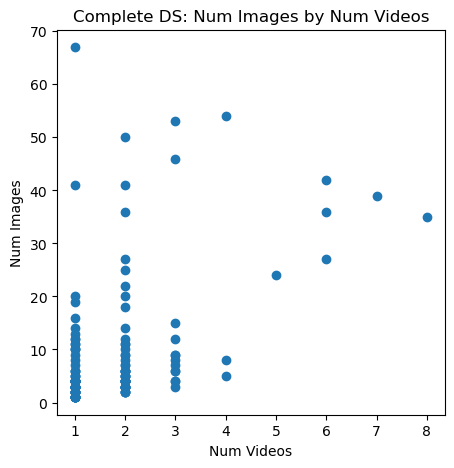

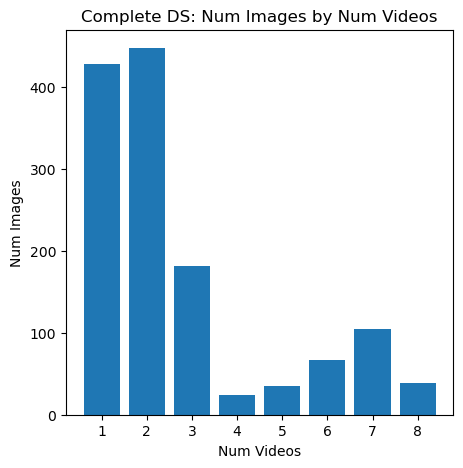

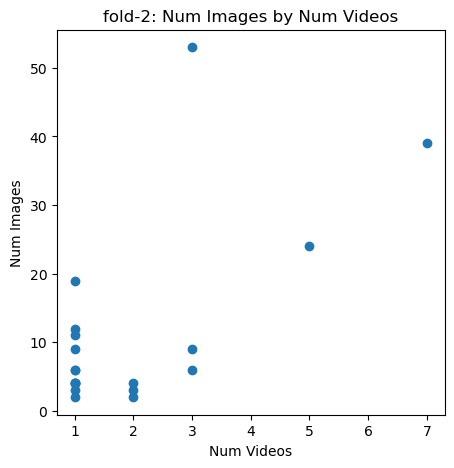

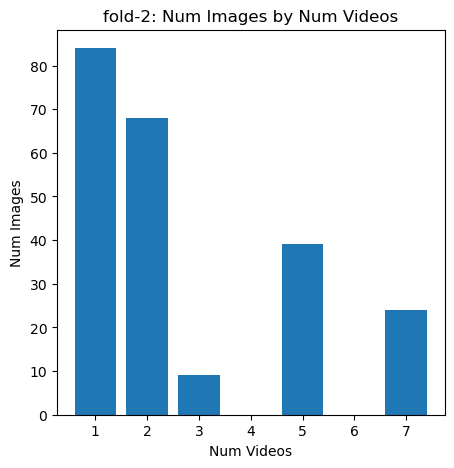

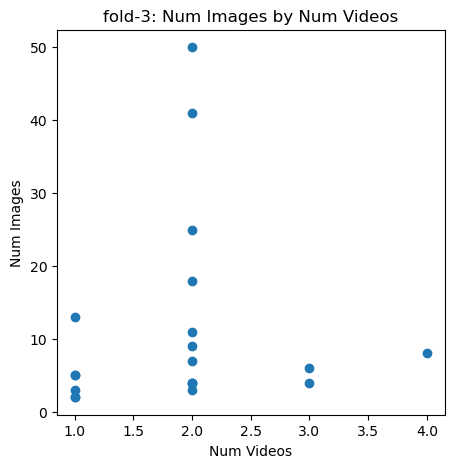

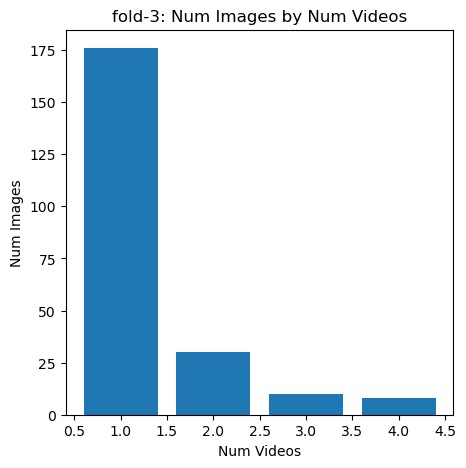

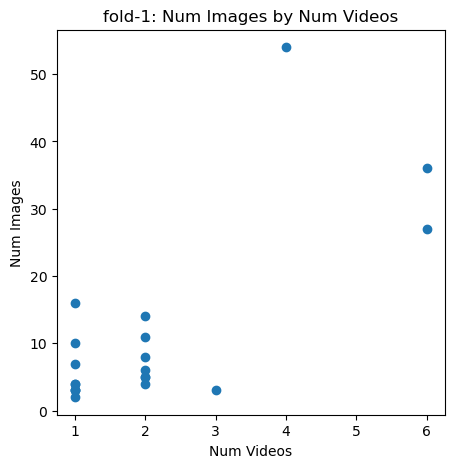

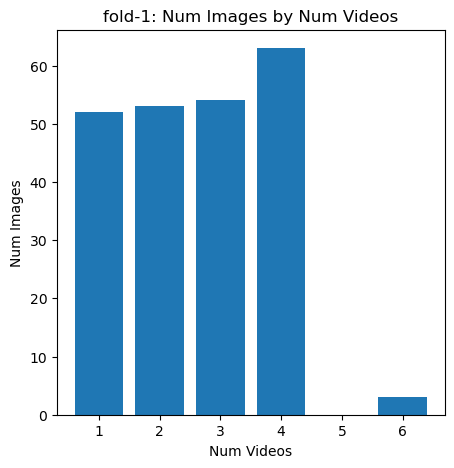

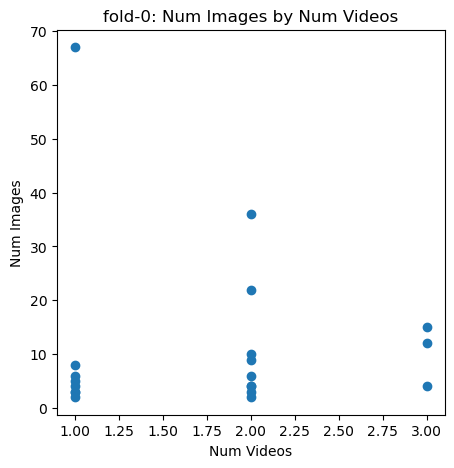

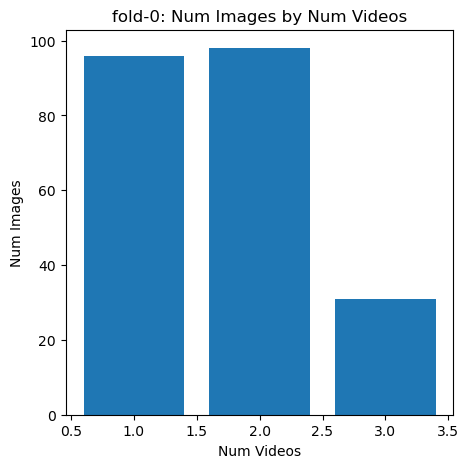

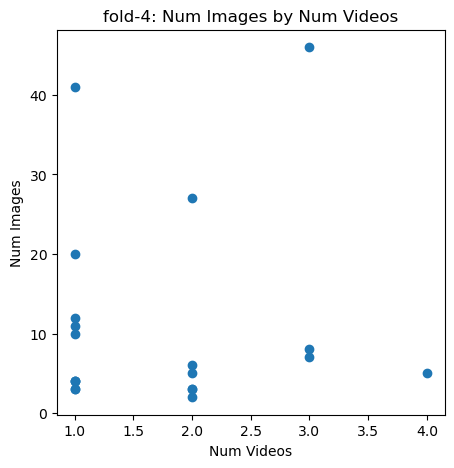

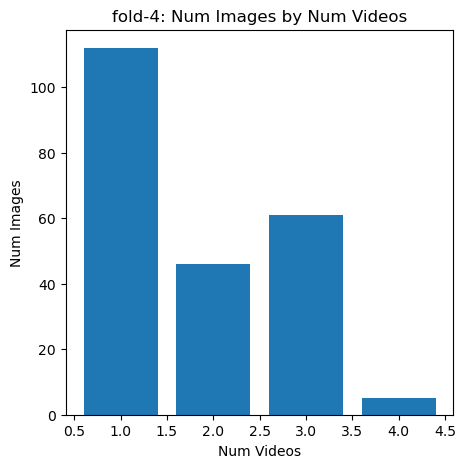

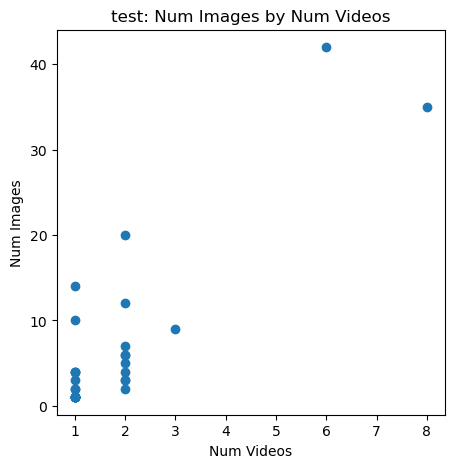

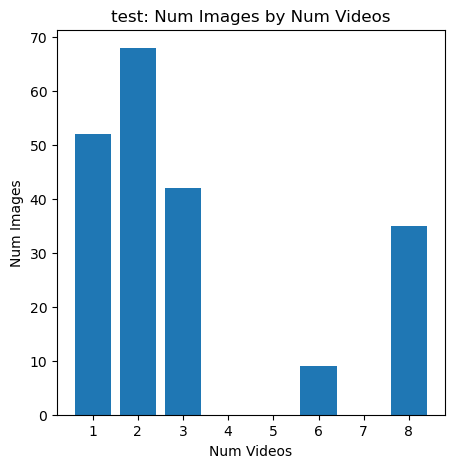

In [12]:
df_combined = pd.concat(df)
unique_videos = df_combined.drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE"])

videos_per_id = unique_videos[["GROUP", "ID"]].copy()
videos_per_id = videos_per_id.groupby(["GROUP", "ID"]).size().reset_index()
images_per_video = df_combined[["GROUP", "ID"]].copy()
images_per_video = images_per_video.groupby(["GROUP", "ID"]).size()
images_per_video.name = "IMAGES"

video_image_distribution = videos_per_id.join(images_per_video, on=["GROUP", "ID"], how="inner")
video_image_distribution["VIDEOS"] = video_image_distribution[0]
video_image_distribution = video_image_distribution.drop(columns=[0])

# plot num_images by number of videos
plt.figure(figsize=(5, 5))
plt.scatter(video_image_distribution["VIDEOS"], video_image_distribution["IMAGES"])
plt.xlabel("Num Videos")
plt.ylabel("Num Images")
plt.title("Complete DS: Num Images by Num Videos")
plt.show()

# number of images per video count
plt.figure(figsize=(5, 5))
plt.bar(video_image_distribution["VIDEOS"].value_counts().index, video_image_distribution.groupby(video_image_distribution["VIDEOS"])["IMAGES"].sum().sort_index().values)
plt.xlabel("Num Videos")
plt.ylabel("Num Images")
plt.title("Complete DS: Num Images by Num Videos")
plt.show()



for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE"])
    videos_per_id = unique_videos[["GROUP", "ID"]].copy()
    videos_per_id = videos_per_id.groupby(["GROUP", "ID"]).size().reset_index()
    images_per_video = df[i][["GROUP", "ID"]].copy()
    images_per_video = images_per_video.groupby(["GROUP", "ID"]).size()
    images_per_video.name = "IMAGES"
    video_image_distribution = videos_per_id.join(images_per_video, on=["GROUP", "ID"], how="inner")
    video_image_distribution["VIDEOS"] = video_image_distribution[0]
    video_image_distribution = video_image_distribution.drop(columns=[0])
    # plot num_images by number of videos
    plt.figure(figsize=(5, 5))
    plt.scatter(video_image_distribution["VIDEOS"], video_image_distribution["IMAGES"])
    plt.xlabel("Num Videos")
    plt.ylabel("Num Images")
    plt.title(f"{d}: Num Images by Num Videos")
    plt.show()
    
    plt.figure(figsize=(5, 5))
    plt.bar(video_image_distribution["VIDEOS"].value_counts().index, video_image_distribution.groupby(video_image_distribution["VIDEOS"])["IMAGES"].sum().sort_index().values)
    plt.xlabel("Num Videos")
    plt.ylabel("Num Images")
    plt.title(f"{d}: Num Images by Num Videos")
    plt.show()



## Number of Images per Video and per Individual

In [13]:
# ASSERT: OPENSET
from collections import defaultdict

combined_ids = df_combined["GROUP"] + df_combined["ID"]
all_individuals = set(combined_ids.unique())
individual_seen_in = defaultdict(set)
print(dirs)
for i, d in enumerate(dirs):
    print(f"Processing {d}")
    individuals = set((df[i]["GROUP"] + df[i]["ID"]).unique())
    for ind in individuals:
        individual_seen_in[ind].add(d)
        
for ind, aDir in individual_seen_in.items():
    if len(aDir) > 1:
        print(f"{ind} seen in {aDir}")
print(individual_seen_in)

['fold-2', 'fold-3', 'fold-1', 'fold-0', 'fold-4', 'test']
Processing fold-2
Processing fold-3
Processing fold-1
Processing fold-0
Processing fold-4
Processing test
defaultdict(<class 'set'>, {'YE40': {'fold-2'}, 'TU20': {'fold-2'}, 'PL47': {'fold-2'}, 'TU05': {'fold-2'}, 'OE00': {'fold-2'}, 'ME60': {'fold-2'}, 'AP61': {'fold-2'}, 'TU41': {'fold-2'}, 'SOLITARY92': {'fold-2'}, 'JZ01': {'fold-2'}, 'VI41': {'fold-2'}, 'VI02': {'fold-2'}, 'GA03': {'fold-2'}, 'HU00': {'fold-2'}, 'NN44': {'fold-2'}, 'RC21': {'fold-2'}, 'NN02': {'fold-2'}, 'ES03': {'fold-2'}, 'HU23': {'fold-2'}, 'ME00': {'fold-2'}, 'ME01': {'fold-3'}, 'GA01': {'fold-3'}, 'GN01': {'fold-3'}, 'US00': {'fold-3'}, 'DU60': {'fold-3'}, 'YE01': {'fold-3'}, 'NN01': {'fold-3'}, 'TU60': {'fold-3'}, 'RC01': {'fold-3'}, 'RC40': {'fold-3'}, 'ES02': {'fold-3'}, 'AY00': {'fold-3'}, 'US04': {'fold-3'}, 'AP01': {'fold-3'}, 'HU21': {'fold-3'}, 'SOLITARY0': {'fold-3'}, 'PL03': {'fold-3'}, 'ES01': {'fold-3'}, 'YE00': {'fold-3'}, 'OE40': {'fold-3

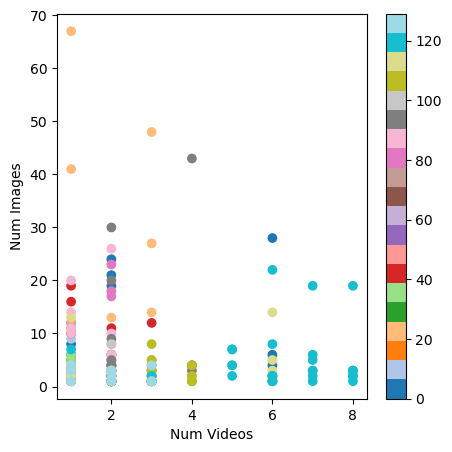

In [14]:
import numpy as np

df_combined = pd.concat(df)
unique_videos = df_combined.drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE"])
videos_per_id = unique_videos[["GROUP", "ID", "CAM", "DATE"]].copy().groupby(["GROUP", "ID"]).size().reset_index()

images_per_video = df_combined[["GROUP", "ID", "CAM", "DATE"]].copy()
images_per_video = images_per_video.groupby(["GROUP", "ID", "CAM", "DATE"]).size()
images_per_video.name = "IMAGES"

images_per_video = images_per_video.reset_index().join(videos_per_id.set_index(["GROUP", "ID"]), on=["GROUP", "ID"], how="inner")
images_per_video["VIDEOS"] = images_per_video[0]
images_per_video = images_per_video.drop(columns=[0])
images_per_video = images_per_video.reset_index()
images_per_video["COMPLETE_ID"] = images_per_video["GROUP"] + images_per_video["ID"]
images_per_video = images_per_video.drop(columns=["GROUP", "ID"])

plt.figure(figsize=(5, 5))
plt.scatter(images_per_video["VIDEOS"], images_per_video["IMAGES"], c=images_per_video["COMPLETE_ID"].astype("category").cat.codes, cmap="tab20")
plt.colorbar()
plt.xlabel("Num Videos")
plt.ylabel("Num Images")
plt.show()


['fold-2', 'fold-3', 'fold-1', 'fold-0', 'fold-4', 'test']
fold-2:
    index   CAM        DATE CLIP_ID  IMAGES COMPLETE_ID
0       0  R066  2022-11-18     125       2        AP61
1       1  R066  2022-11-18     194       1        AP61
2       2  R066  2022-11-18     196       2        AP61
3       3  R066  2022-11-18     223       1        AP61
4       4  R066  2022-11-18     225       3        AP61
..    ...   ...         ...     ...     ...         ...
81     81  R465  2023-09-13     131       1        VI41
82     82  R465  2023-09-13     157       3        VI41
83     83  R465  2023-09-17     179       4        VI41
84     84  R035  2019-10-12     097       1        YE40
85     85  R035  2022-04-05     006       3        YE40

[86 rows x 6 columns]
   COMPLETE_ID   CAM        DATE CLIP_ID_FIRST CLIP_ID_LAST  IMAGES
0         AP61  R066  2022-11-18           125          125     2.0
1         AP61  R066  2022-11-18           194          196     3.0
2         AP61  R066  2022-11-18  

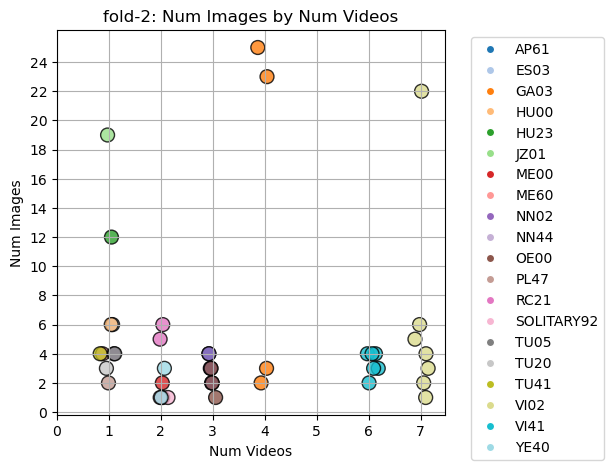

fold-3:
    index   CAM        DATE CLIP_ID  IMAGES COMPLETE_ID
0       0  R066  2022-11-18     104       2        AP01
1       1  R066  2022-11-18     175      15        AP01
2       2  R066  2022-11-18     176       1        AP01
3       3  R066  2022-11-18     177       1        AP01
4       4  R172  2022-09-13     151       6        AP01
..    ...   ...         ...     ...     ...         ...
85     85  R035  2019-10-12     079       1        YE01
86     86  R035  2021-11-09     029       1        YE01
87     87  R035  2022-04-05     008       2        YE01
88     88  R035  2022-04-05     009       1        YE01
89     89  R035  2022-04-05     012       1        YE01

[90 rows x 6 columns]
   COMPLETE_ID   CAM        DATE CLIP_ID_FIRST CLIP_ID_LAST  IMAGES
0         AP01  R066  2022-11-18           104          104     2.0
1         AP01  R066  2022-11-18           175          177    17.0
2         AP01  R172  2022-09-13           151          151     6.0
3         AY00  R040  201

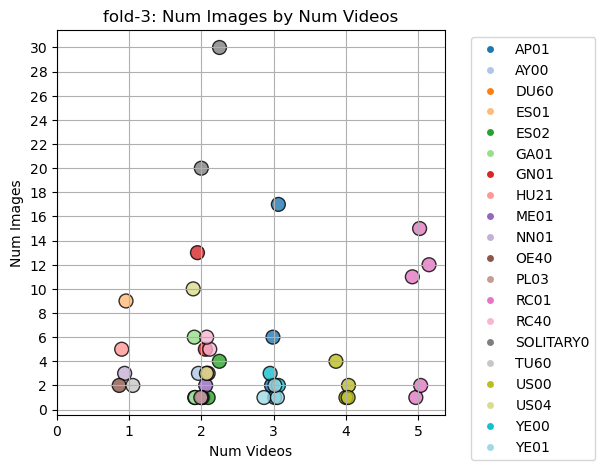

fold-1:
    index   CAM        DATE CLIP_ID  IMAGES COMPLETE_ID
0       0  R040  2019-07-27     007       1        AY04
1       1  R040  2020-10-10     102       1        AY04
2       2  R040  2020-10-10     145       1        AY04
3       3  R040  2020-10-10     204       1        AY04
4       4  R030  2021-11-23     040       4        DU01
..    ...   ...         ...     ...     ...         ...
82     82  R465  2023-09-13     151       6        VI01
83     83  R465  2023-09-13     153       2        VI01
84     84  R465  2023-09-13     149       6        VI42
85     85  R465  2023-09-13     157       1        VI42
86     86  R035  2021-11-25     029       3        YE03

[87 rows x 6 columns]
   COMPLETE_ID   CAM        DATE CLIP_ID_FIRST CLIP_ID_LAST  IMAGES
0         AY04  R040  2019-07-27           007          007     1.0
1         AY04  R040  2020-10-10           102          102     1.0
2         AY04  R040  2020-10-10           145          145     1.0
3         AY04  R040  202

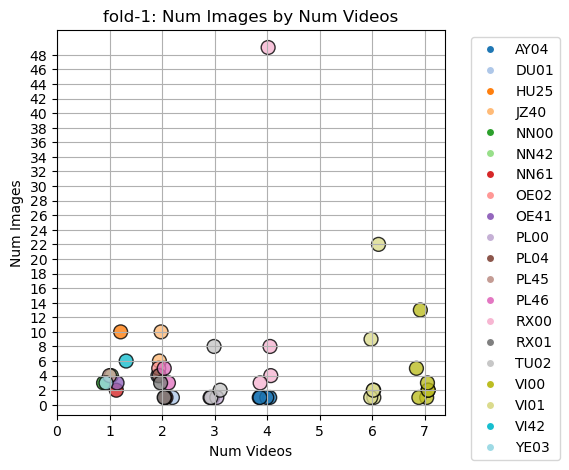

fold-0:
    index   CAM        DATE CLIP_ID  IMAGES COMPLETE_ID
0       0  R066  2022-11-18     193       3        AP02
1       1  R066  2022-11-18     194       3        AP02
2       2  R066  2022-11-18     195       3        AP02
3       3  R066  2022-11-18     196       1        AP02
4       4  R066  2022-11-18     203       1        AP02
..    ...   ...         ...     ...     ...         ...
84     84  R033  2022-01-14     353       1        US03
85     85  R172  2019-03-25     050       1        ZU02
86     86  R172  2019-04-06     397       1        ZU02
87     87  R172  2019-03-14     284       1        ZU05
88     88  R172  2021-07-19     450       2        ZU05

[89 rows x 6 columns]
   COMPLETE_ID   CAM        DATE CLIP_ID_FIRST CLIP_ID_LAST  IMAGES
0         AP02  R066  2022-11-18           193          223    21.0
1         AP02  R172  2022-09-13           152          152     1.0
2         AP40  R172  2022-09-13           144          144     8.0
3         AP60  R066  202

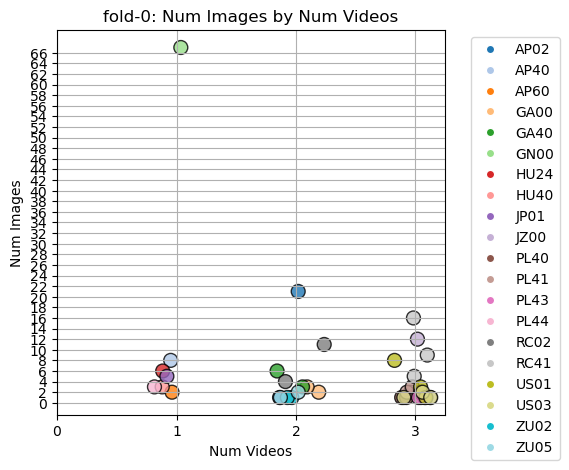

fold-4:
    index    CAM        DATE CLIP_ID  IMAGES COMPLETE_ID
0       0   R066  2022-11-18     155       4        AP03
1       1   R066  2022-11-18     157       2        AP03
2       2   R066  2022-11-18     158       1        AP03
3       3   R066  2022-11-18     159       2        AP03
4       4   R066  2022-11-18     162       1        AP03
..    ...    ...         ...     ...     ...         ...
87     87   R118  2022-01-28     104       2        TU06
88     88   R033  2022-01-12     226       3        US41
89     89   R033  2022-01-12     242       3        US41
90     90   R020  2022-02-05     074       3        US43
91     91   R172  2021-07-19     432       4        ZU06

[92 rows x 6 columns]
   COMPLETE_ID    CAM        DATE CLIP_ID_FIRST CLIP_ID_LAST  IMAGES
0         AP03   R066  2022-11-18           155          173    24.0
1         AP03   R198  2022-09-29           158          158     3.0
2         GA02   R018  2022-01-20           065          069     4.0
3        

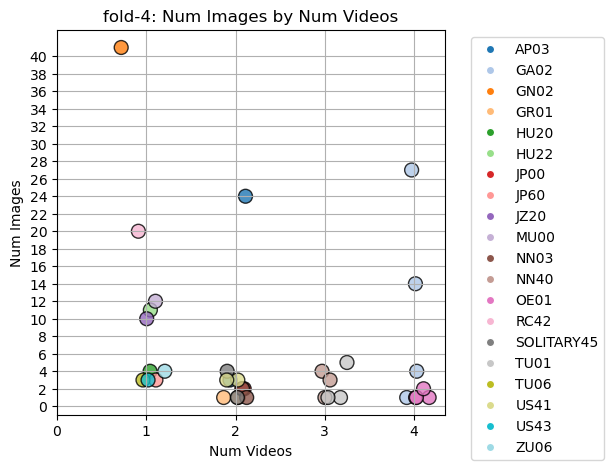

test:
    index   CAM        DATE CLIP_ID  IMAGES COMPLETE_ID
0       0  R065  2021-10-24     094       1        0E00
1       1  R066  2022-11-18     110       2        AP00
2       2  R066  2022-11-18     115       1        AP00
3       3  R066  2022-11-18     122       1        AP00
4       4  R066  2022-11-18     127       1        AP00
..    ...   ...         ...     ...     ...         ...
82     82  R465  2023-06-16     517      19        VI40
83     83  R465  2023-08-31     148       3        VI40
84     84  R465  2023-09-02     395       1        VI40
85     85  R465  2023-09-13     143       2        VI40
86     86  R035  2019-10-12     099       1        YE02

[87 rows x 6 columns]
     COMPLETE_ID   CAM        DATE CLIP_ID_FIRST CLIP_ID_LAST  IMAGES
0           0E00  R065  2021-10-24           094          094     1.0
1           AP00  R066  2022-11-18           110          148    28.0
2           AP00  R172  2022-08-26           252          252     6.0
3           AP00  R

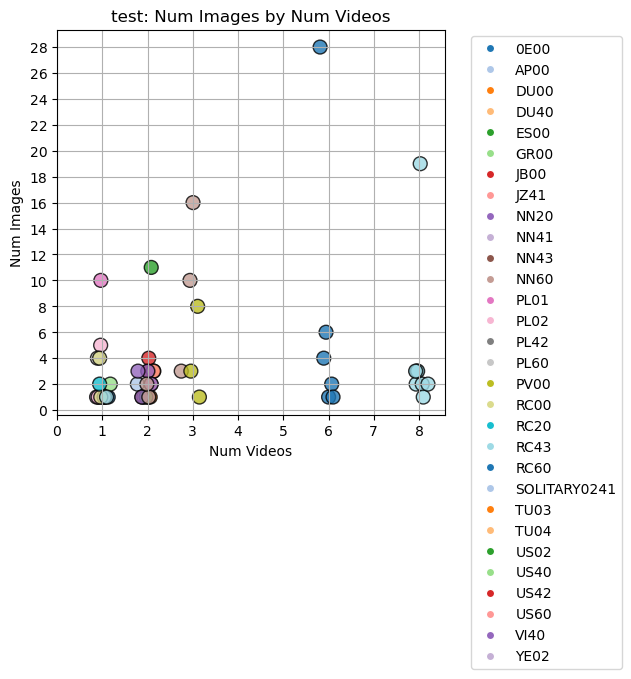

In [27]:
print(dirs)
magic_number = 16

for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE", "CLIP_ID"])
    
    videos_per_id = unique_videos[["GROUP", "ID", "CAM", "DATE", "CLIP_ID"]].copy().groupby(["GROUP", "ID"]).size().reset_index()
    images_per_video = df[i][["GROUP", "ID", "CAM", "DATE", "CLIP_ID"]].copy()
    images_per_video = images_per_video.groupby(["GROUP", "ID", "CAM", "DATE", "CLIP_ID"]).size()
    images_per_video.name = "IMAGES"
    images_per_video = images_per_video.reset_index().join(videos_per_id.set_index(["GROUP", "ID"]), on=["GROUP", "ID"], how="inner")
    # images_per_video["VIDEOS"] = images_per_video[0]
    images_per_video = images_per_video.drop(columns=[0])
    images_per_video = images_per_video.reset_index()
    images_per_video["COMPLETE_ID"] = images_per_video["GROUP"] + images_per_video["ID"]
    images_per_video = images_per_video.drop(columns=["GROUP", "ID"])
    print(f"{d}:")
    print(images_per_video)
    
    unique_videos = images_per_video
    unique_videos_tmp = pd.DataFrame(columns=["COMPLETE_ID", "CAM", "DATE", "CLIP_ID_FIRST", "CLIP_ID_LAST"])
    
    unique_videos = unique_videos.sort_values(by=["COMPLETE_ID", "CAM", "DATE", "CLIP_ID"])
    for index, row in unique_videos.iterrows():
        complete_id, cam, date, clip_id, images = row["COMPLETE_ID"], row["CAM"], row["DATE"], row["CLIP_ID"], row["IMAGES"]
        # filter if groupd, id_, cam, date are given in the unique_videos_tmp df
        if unique_videos_tmp[(unique_videos_tmp["COMPLETE_ID"] == complete_id) & (unique_videos_tmp["CAM"] == cam) & (unique_videos_tmp["DATE"] == date)].shape[0] == 0:
            row = {"COMPLETE_ID": complete_id, "CAM": cam, "DATE": date, "CLIP_ID_FIRST": clip_id, "CLIP_ID_LAST": clip_id, "IMAGES": images}
            unique_videos_tmp = pd.concat([
                unique_videos_tmp,
                pd.DataFrame([row], columns=["COMPLETE_ID", "CAM", "DATE", "CLIP_ID_FIRST", "CLIP_ID_LAST", "IMAGES"])
            ], ignore_index=True)
        else: # check if the difference between Clip_ID and CLIP_ID_LAST less than magic_number
            done = False
            for index_tmp, row_tmp in unique_videos_tmp.iterrows():
                if row_tmp["COMPLETE_ID"] and row_tmp["CAM"] == cam and row_tmp["DATE"] == date:
                    if int(clip_id) - int(row_tmp["CLIP_ID_LAST"]) <= magic_number:
                        unique_videos_tmp.at[index_tmp, "CLIP_ID_LAST"] = clip_id
                        unique_videos_tmp.at[index_tmp, "IMAGES"] += images
                        done = True
                        break
            if not done:         
                row = {"COMPLETE_ID": complete_id, "CAM": cam, "DATE": date, "CLIP_ID_FIRST": clip_id, "CLIP_ID_LAST": clip_id, "IMAGES": images}
                unique_videos_tmp = pd.concat([
                    unique_videos_tmp,
                    pd.DataFrame([row], columns=["COMPLETE_ID", "CAM", "DATE", "CLIP_ID_FIRST", "CLIP_ID_LAST", "IMAGES"])
                ], ignore_index=True)
                        
    print(unique_videos_tmp)
    images_per_video = unique_videos_tmp
    video_counts = images_per_video.groupby(["COMPLETE_ID"]).size().reset_index()
    video_counts["VIDEOS"] = video_counts[0]
    video_counts = video_counts[["COMPLETE_ID", "VIDEOS"]]
    images_per_video = images_per_video.join(video_counts.set_index(["COMPLETE_ID"]), on=["COMPLETE_ID"], how="inner")
    print(images_per_video)
    

    plt.figure(figsize=(5, 5))
    plt.grid(True)
    jitter = np.random.normal(0, 0.1, images_per_video.shape[0])
    plt.scatter(images_per_video["VIDEOS"] + jitter, images_per_video["IMAGES"], c=images_per_video["COMPLETE_ID"].astype("category").cat.codes, cmap="tab20", alpha=0.8, s=100, edgecolors="black")
    
    handles = [plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=plt.cm.tab20.colors[i % len(plt.cm.tab20.colors)], label=id_) for i, id_ in enumerate(images_per_video["COMPLETE_ID"].unique())]
    plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc="upper left")
    
    plt.xticks(np.arange(0, images_per_video["VIDEOS"].max() + 1, 1))
    plt.yticks(np.arange(0, images_per_video["IMAGES"].max() + 1, 2))
    plt.xlabel("Num Videos")
    plt.ylabel("Num Images")
    plt.title(f"{d}: Num Images by Num Videos")
    plt.show()

## Number of Cameras per Individual

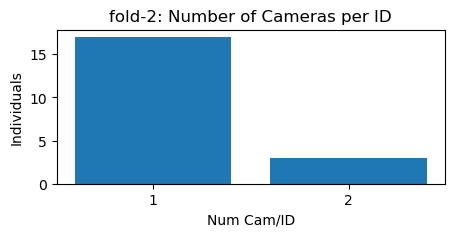

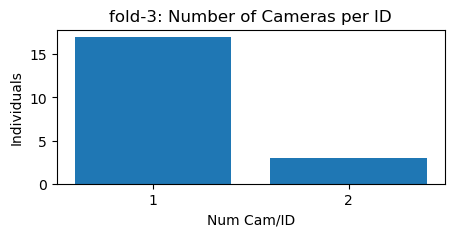

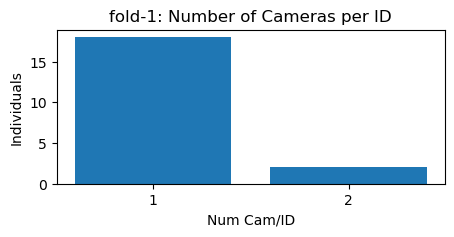

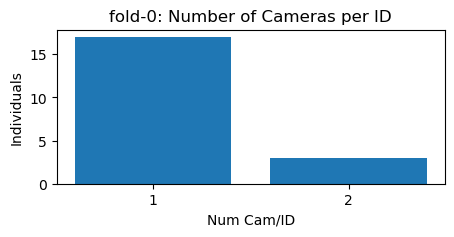

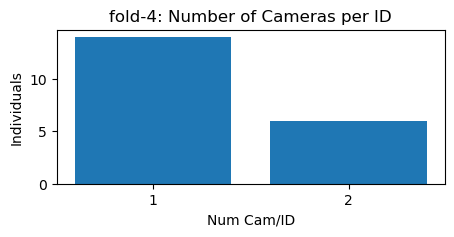

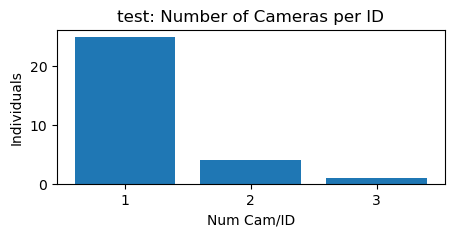

In [12]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=["GROUP", "ID", "CAM"])
    videos_per_id = unique_videos.groupby(["GROUP", "ID"]).size()
    video_count_distribution = videos_per_id.value_counts().sort_index()
    plt.figure(figsize=(5, 2))
    plt.bar(video_count_distribution.index, video_count_distribution.values)
    plt.xlabel("Num Cam/ID")
    plt.ylabel("Individuals")
    plt.title(f"{d}: Number of Cameras per ID")
    plt.xticks(video_count_distribution.index)
    plt.show()

## Images per Camera

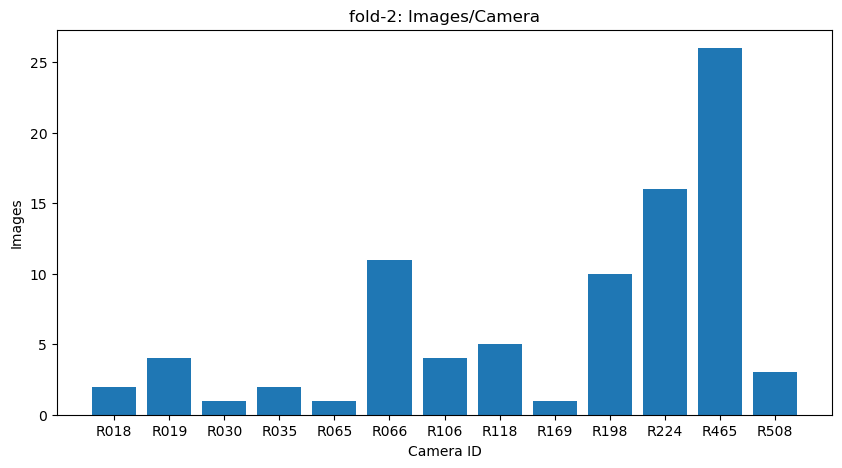

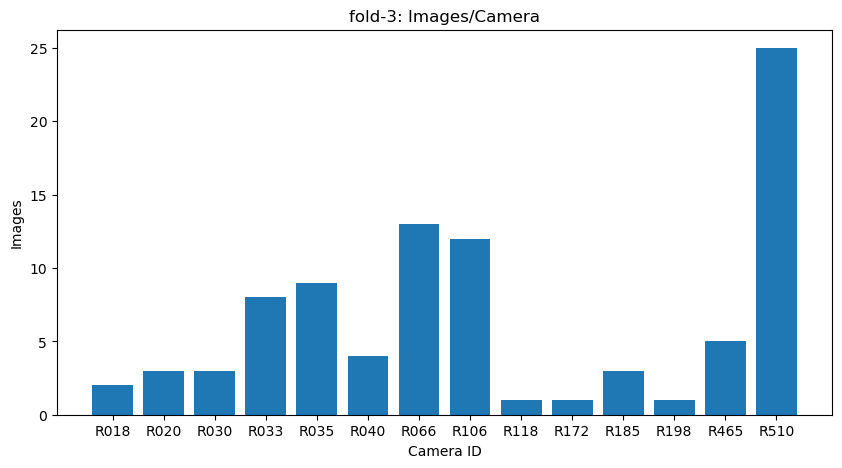

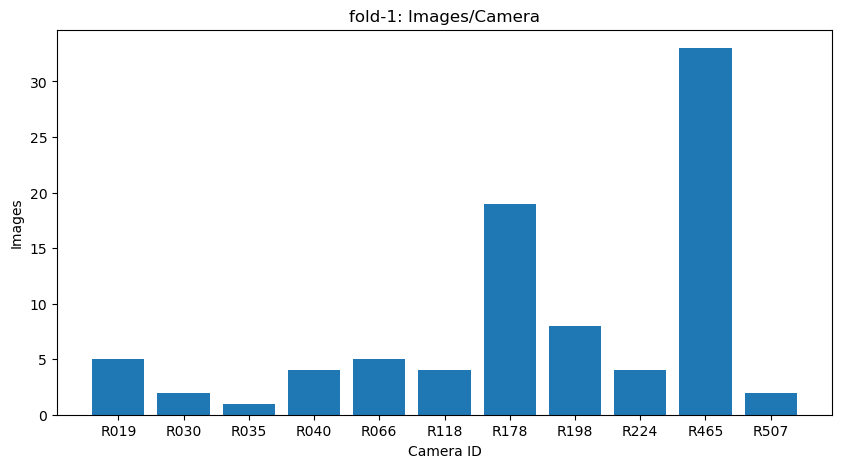

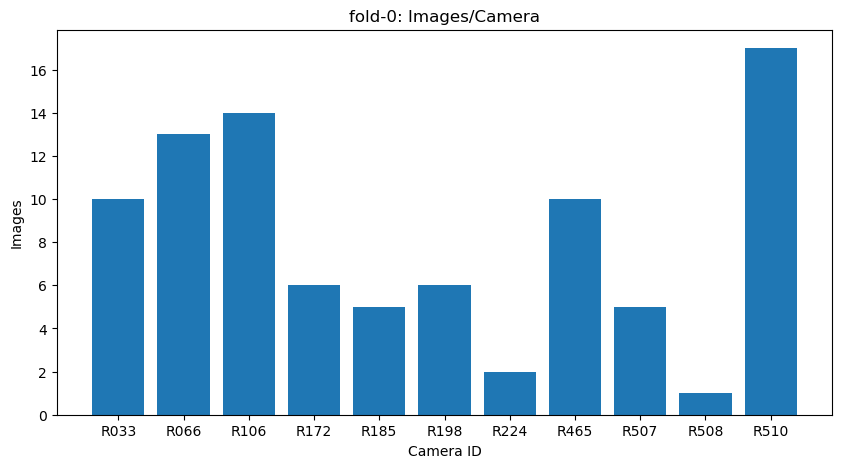

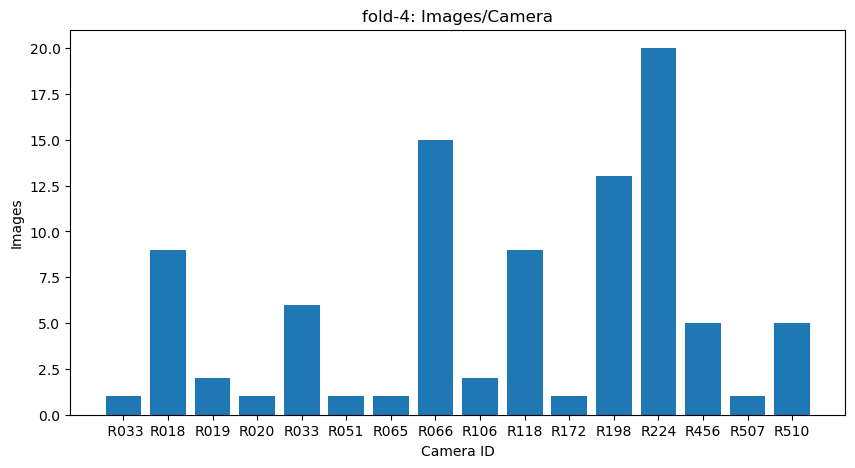

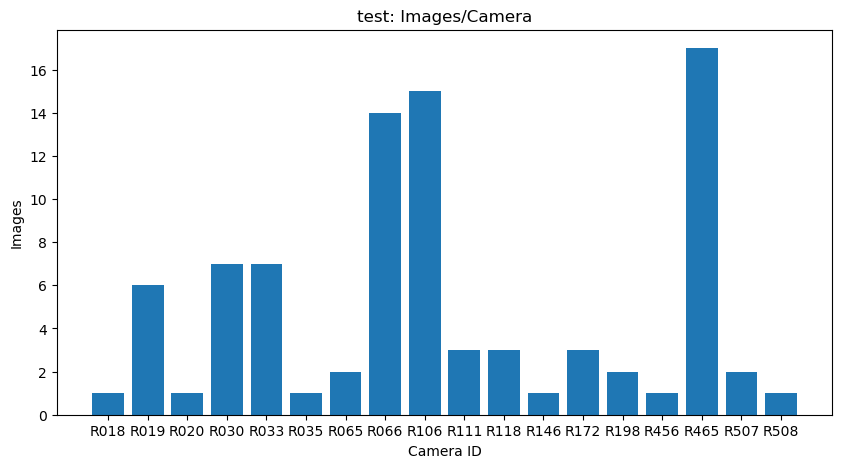

In [13]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE", "ID2"])
    images_per_camera = unique_videos.groupby("CAM").size()
    plt.figure(figsize=(10, 5))
    plt.bar(images_per_camera.index, images_per_camera.values)
    plt.xlabel("Camera ID")
    plt.ylabel("Images")
    plt.title(f"{d}: Images/Camera")
    plt.show()

## Individuals per Camera

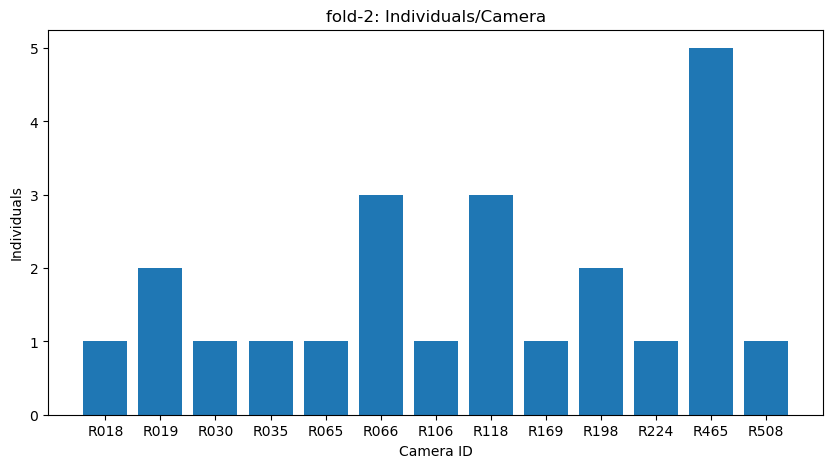

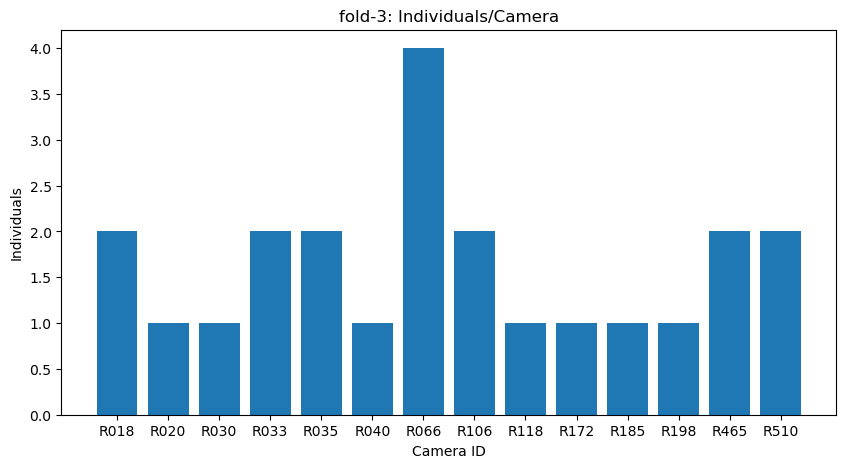

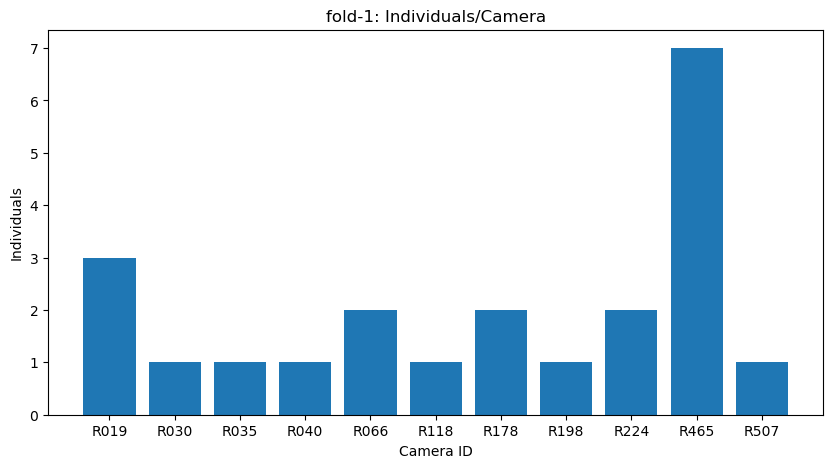

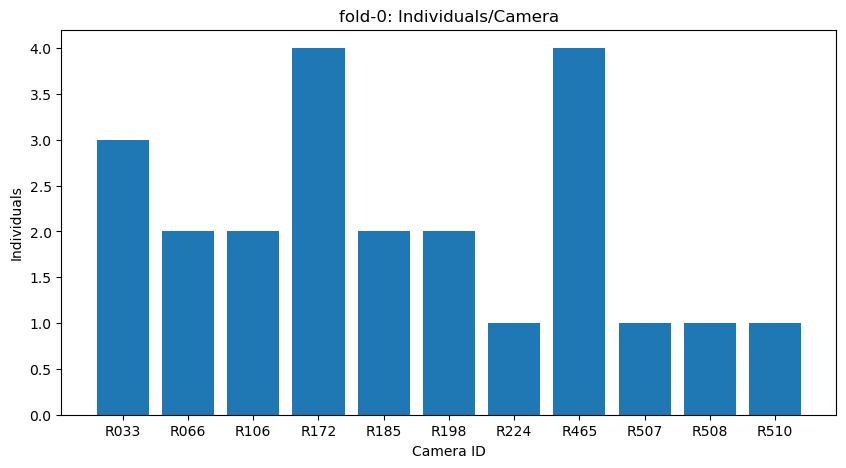

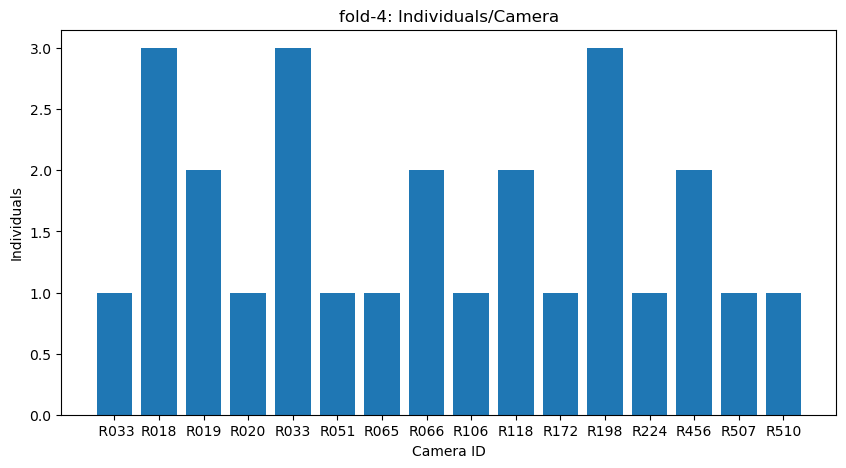

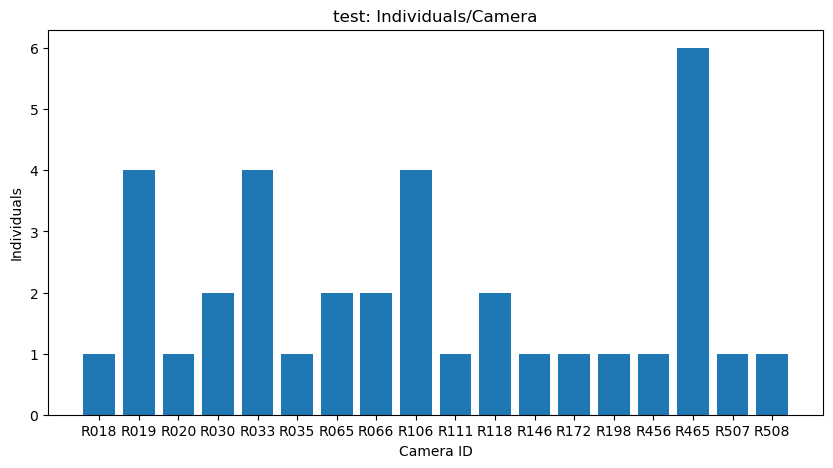

In [14]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE", "ID2"])
    individuals_per_camera = unique_videos.groupby(["CAM", "GROUP", "ID"]).size().reset_index().groupby("CAM").size()
    plt.figure(figsize=(10, 5))
    plt.bar(individuals_per_camera.index, individuals_per_camera.values)
    plt.xlabel("Camera ID")
    plt.ylabel("Individuals")
    plt.title(f"{d}: Individuals/Camera")
    plt.show()

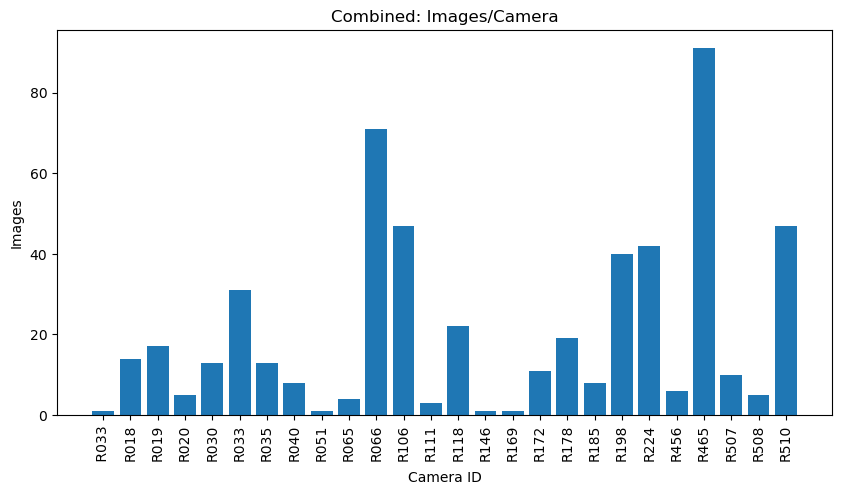

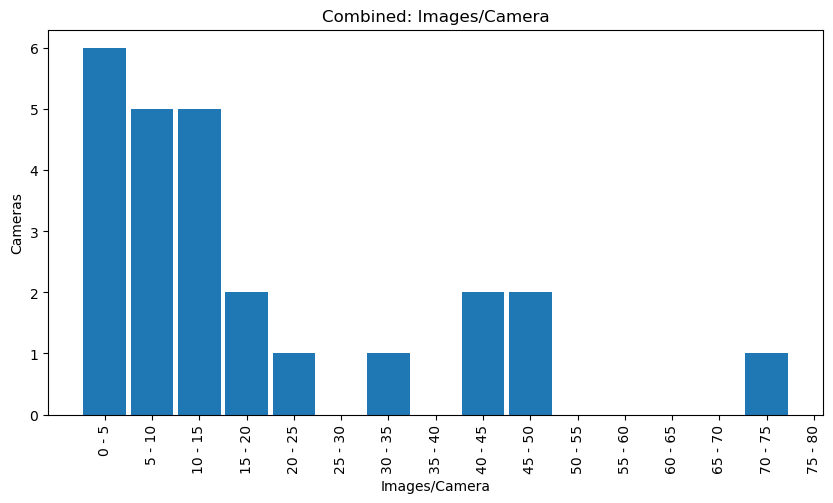

In [15]:
# combined
df_combined = pd.concat(df)
unique_videos = df_combined.drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE", "ID2"])
images_per_camera = unique_videos.groupby("CAM").size()
plt.figure(figsize=(10, 5))
plt.bar(images_per_camera.index, images_per_camera.values)
plt.xlabel("Camera ID")
plt.ylabel("Images")
plt.title("Combined: Images/Camera")
plt.xticks(rotation=90)
plt.show()

# make this plot a histogram with bins of 10 images per camera and show the number of cameras in each bin
# center the bins
plt.figure(figsize=(10, 5))
plt.hist(images_per_camera, bins=range(0, 80, 5), align="left", rwidth=0.9)
plt.xticks(ticks=range(0, 80, 5), labels=[f"{i} - {i+5}" for i in range(0, 80, 5)], rotation=90)
plt.xlabel("Images/Camera")
plt.ylabel("Cameras")
plt.title("Combined: Images/Camera")
plt.show()

## Individuals per Group

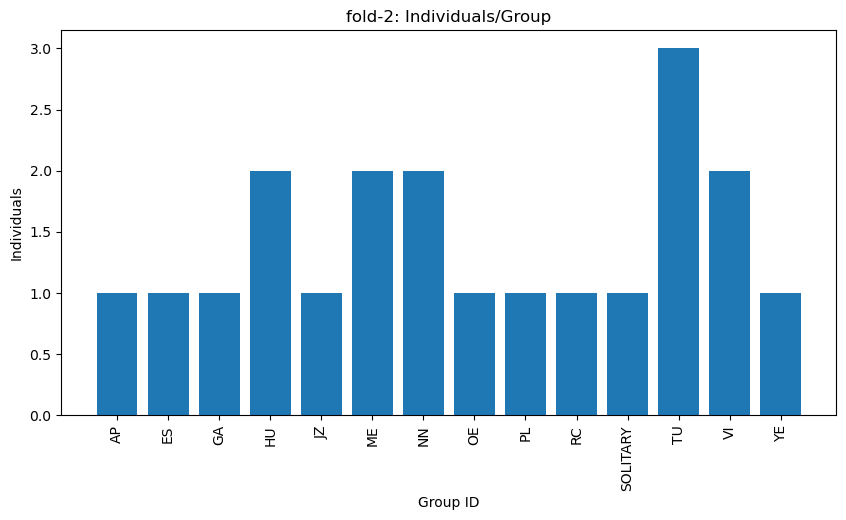

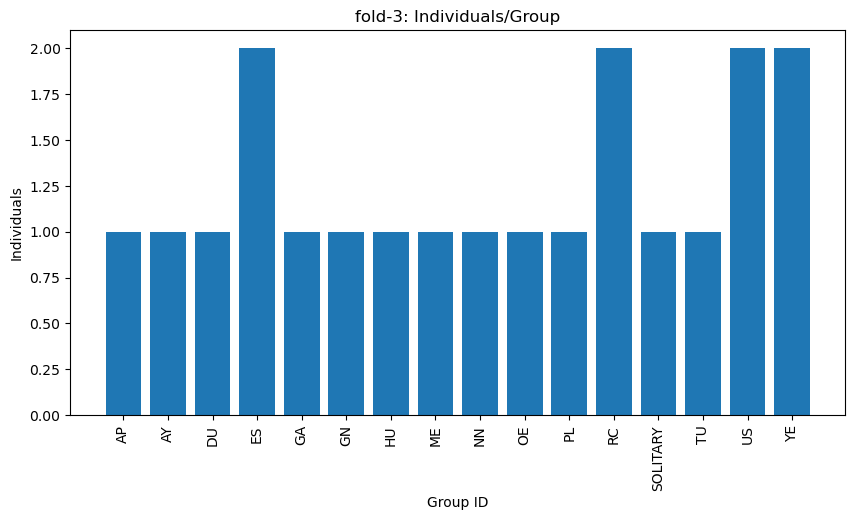

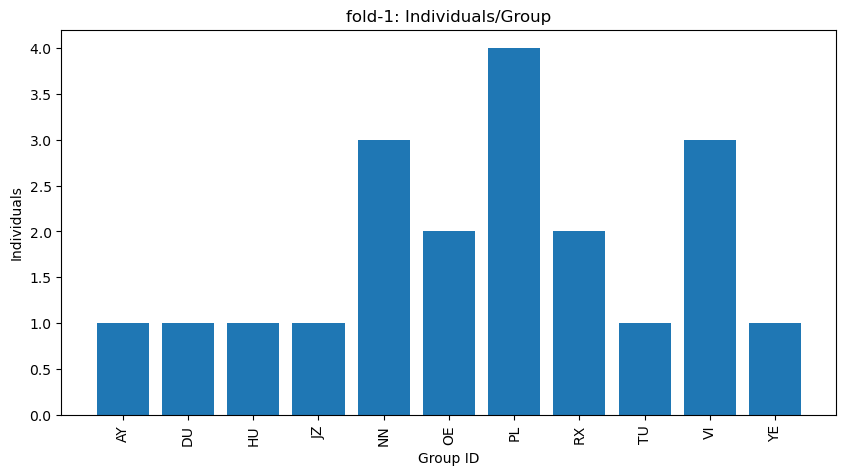

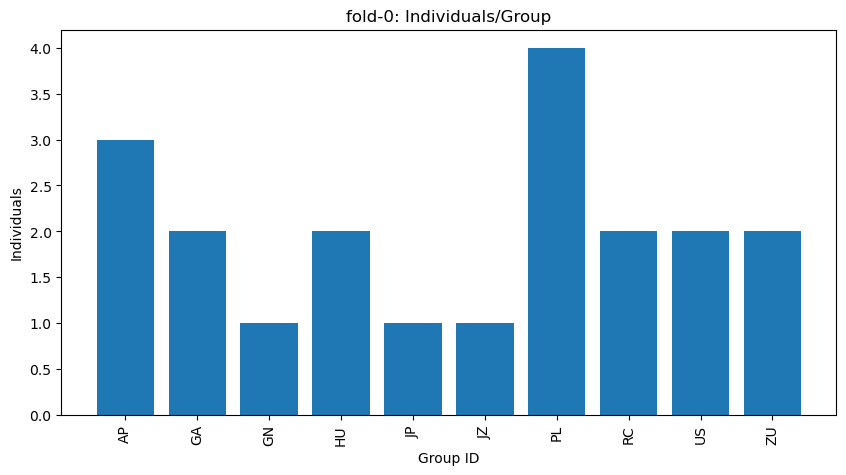

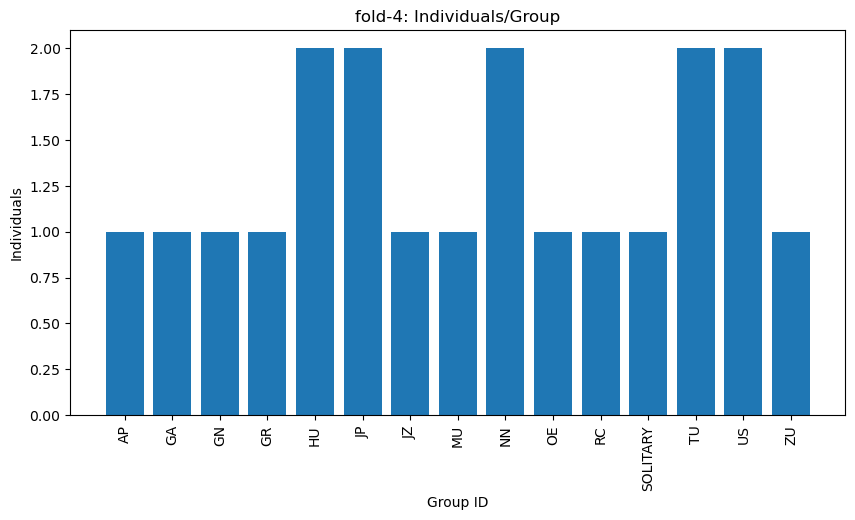

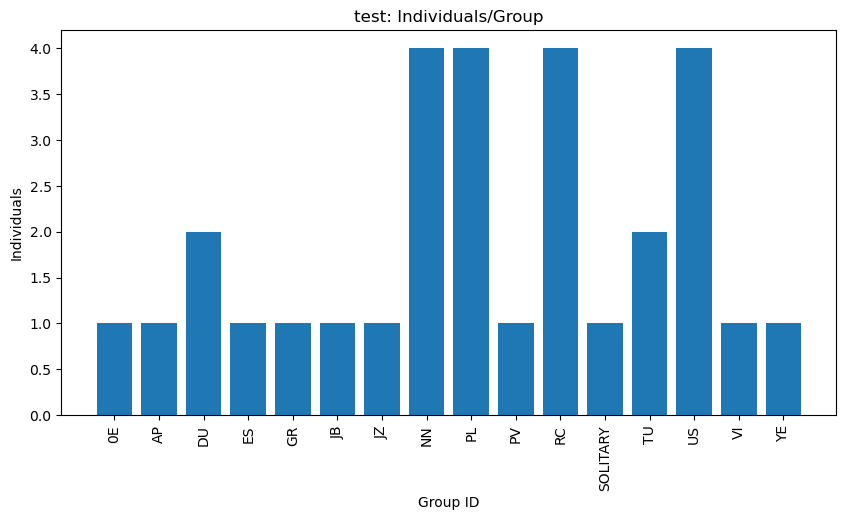

In [16]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=["GROUP", "ID", "CAM", "DATE", "ID2"])
    unique_individuals_per_group = unique_videos.groupby(["GROUP", "ID"]).size().reset_index().groupby("GROUP").size()
    plt.figure(figsize=(10, 5))
    plt.bar(unique_individuals_per_group.index, unique_individuals_per_group.values)
    plt.xlabel("Group ID")
    plt.ylabel("Individuals")
    plt.title(f"{d}: Individuals/Group")
    plt.xticks(rotation=90)
    plt.show()

## Images per Category

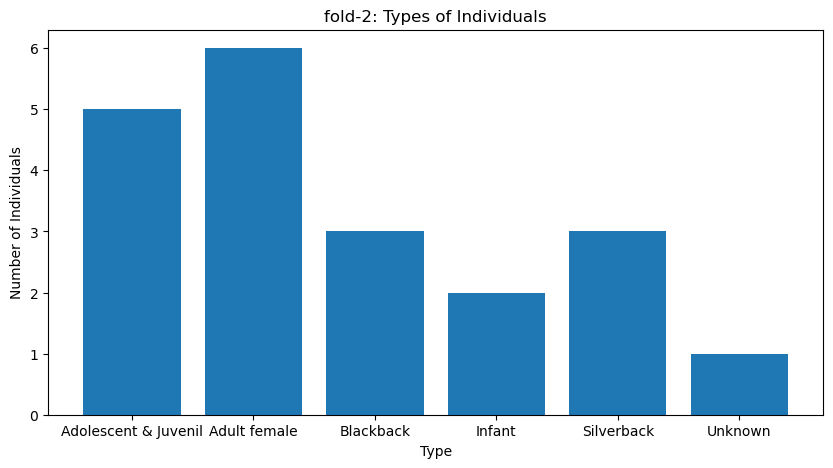

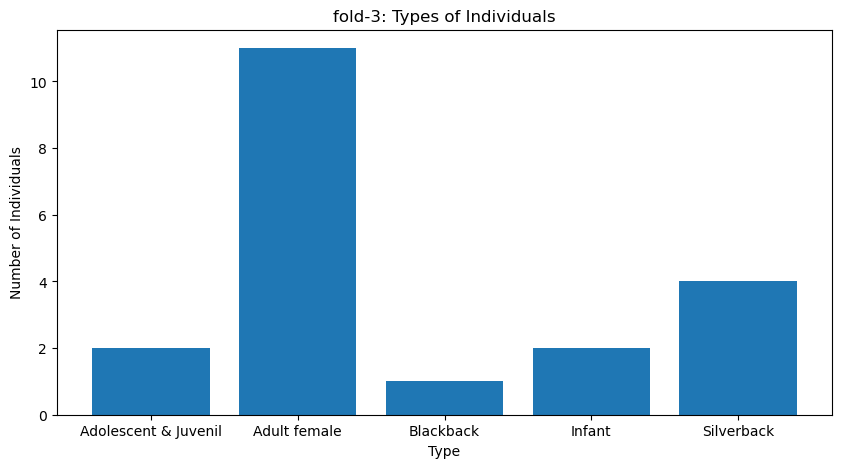

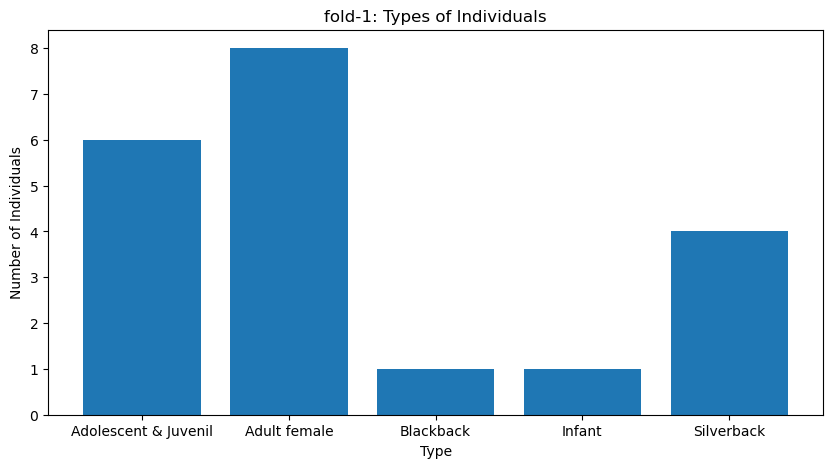

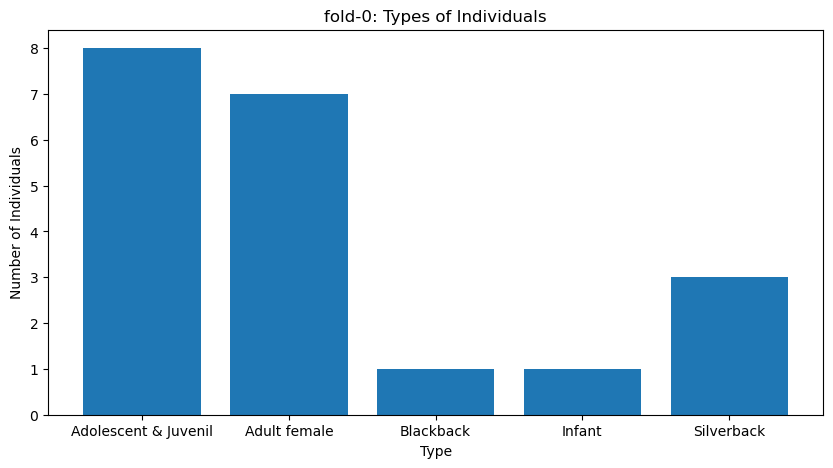

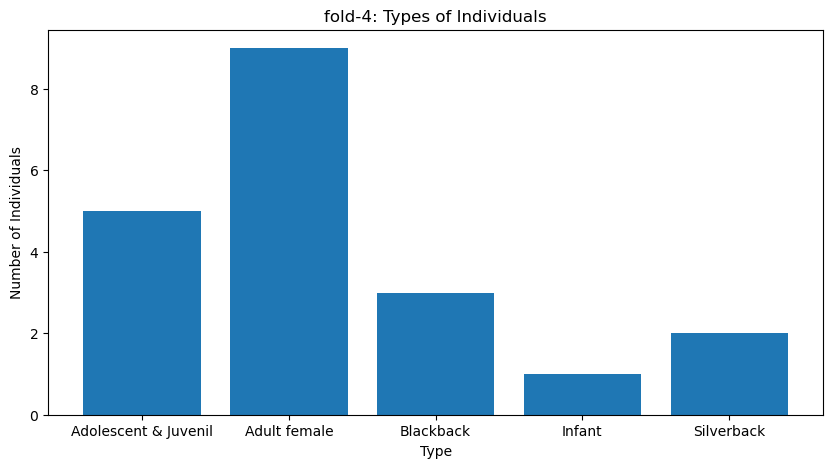

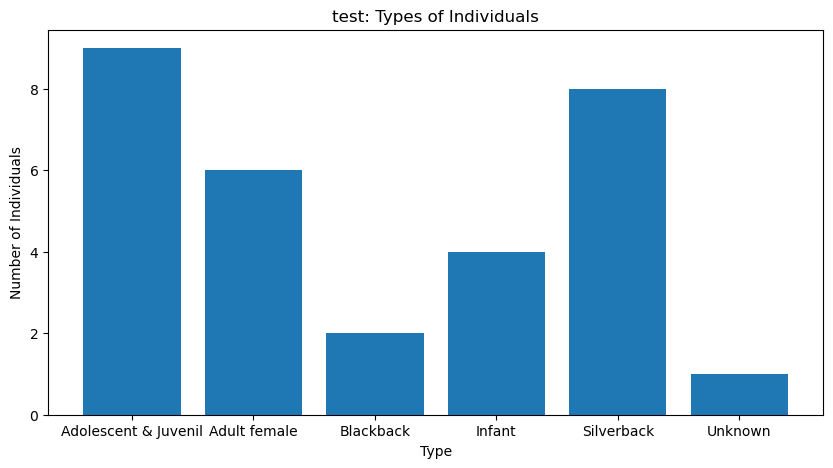

In [17]:
def categorize_id(id_):
    id_num = int(id_)
    if id_num == 0:
        return "Silverback"
    elif 1 <= id_num <= 19:
        return "Adult female"
    elif 20 <= id_num <= 39:
        return "Blackback"
    elif 40 <= id_num <= 59:
        return "Adolescent & Juvenil"
    elif 60 <= id_num <= 79:
        return "Infant"
    else:
        return "Unknown"

for i, d in enumerate(dirs):
    unique_individuals = df[i].drop_duplicates(subset=["GROUP", "ID"]).copy()
    # filter out non numeric IDs
    unique_individuals = unique_individuals[unique_individuals["ID"].str.isnumeric()]
    
    # Categorize each ID and add to the DataFrame using assign()
    unique_individuals = unique_individuals.assign(Type=unique_individuals["ID"].apply(categorize_id))
    
    # Calculate the number of each type
    type_distribution = unique_individuals["Type"].value_counts().sort_index()
    
    
    # Plot the distribution of types
    plt.figure(figsize=(10, 5))
    plt.bar(type_distribution.index, type_distribution.values)
    plt.xlabel("Type")
    plt.ylabel("Number of Individuals")
    plt.title(f"{d}: Types of Individuals")
    plt.show()

# Resolution of Images

In [18]:
# plot the resolution of all combined images 

from PIL import Image

img_sizes = []
for row in df_combined.itertuples():
    img = Image.open(os.path.join(dir_path, row[6]))
    img_sizes.append(img.size)
        
len(img_sizes)

1328

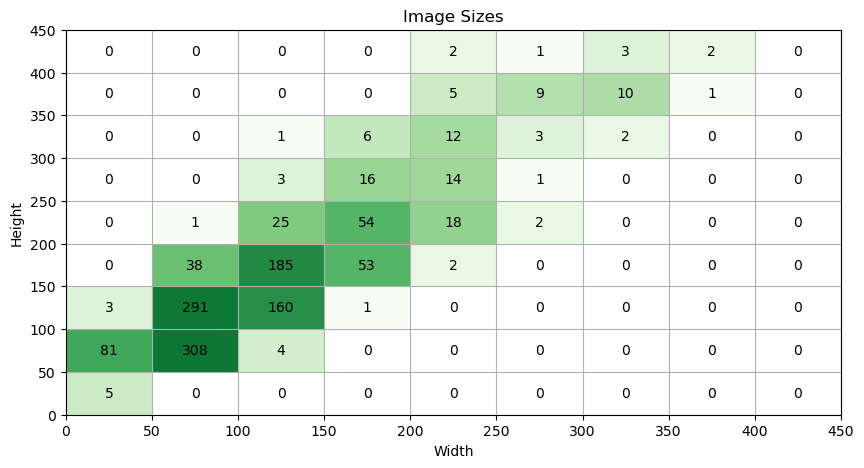

In [19]:
# make a matrix histogram of the image sizes (width x height)
from matplotlib.colors import LogNorm
import numpy as np

plt.figure(figsize=(10, 5))
amounts_x, amounts_y = [x[0] for x in img_sizes], [x[1] for x in img_sizes]
norm = LogNorm(vmax=1000)
plt.hist2d(amounts_x, amounts_y, bins=range(0, 500, 50), cmap="Greens", norm=norm)
for i in range(0, 450, 50):
    for j in range(0, 450, 50):
        plt.text(i+25, j+25, f"{len([1 for x in img_sizes if i <= x[0] < i+50 and j <= x[1] < j+50])}", color="black", ha="center", va="center")
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Sizes")
# plt.colorbar()
plt.grid()
plt.show()

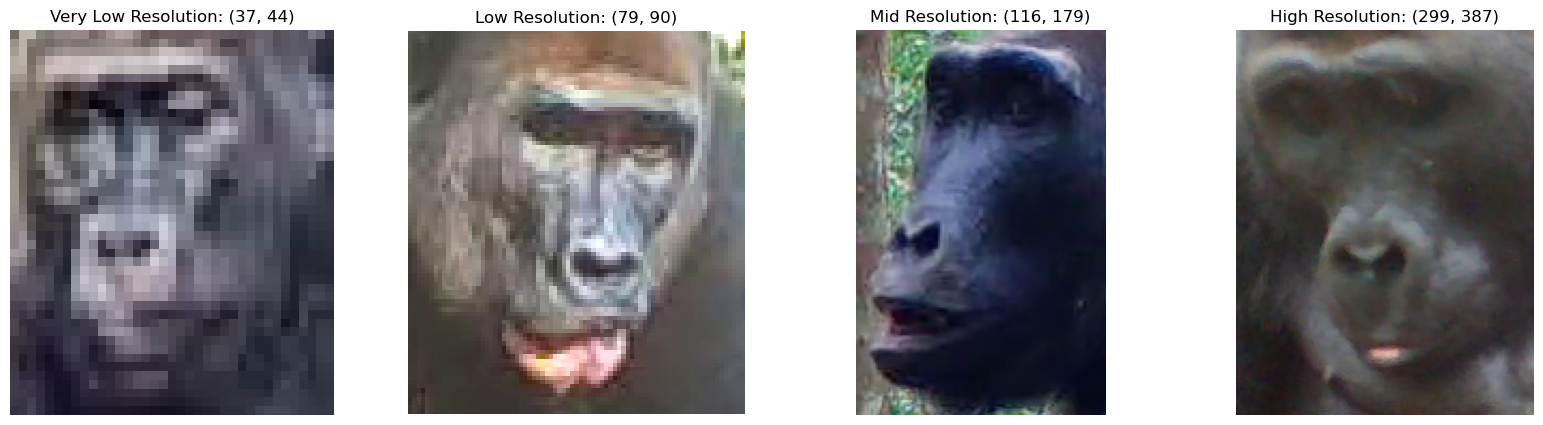

In [20]:
# plot one low mid and high resolution image
very_low_res = [x for x in img_sizes if x[0] < 50 and x[1] < 50][1]
low_res = [x for x in img_sizes if 50 <= x[0] < 100 and 50 <= x[1] < 100][0]
mid_res = [x for x in img_sizes if 100 <= x[0] < 200 and 100 <= x[1] < 200][0]
high_res = [x for x in img_sizes if x[0] > 200 and x[1] > 200][21]

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(Image.open(os.path.join(dir_path, df_combined.iloc[img_sizes.index(very_low_res)]["FILENAME"])))
plt.title(f"Very Low Resolution: {very_low_res}")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(Image.open(os.path.join(dir_path, df_combined.iloc[img_sizes.index(low_res)]["FILENAME"])))
plt.title(f"Low Resolution: {low_res}")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(Image.open(os.path.join(dir_path, df_combined.iloc[img_sizes.index(mid_res)]["FILENAME"])))
plt.title(f"Mid Resolution: {mid_res}")
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(Image.open(os.path.join(dir_path, df_combined.iloc[img_sizes.index(high_res)]["FILENAME"])))
plt.title(f"High Resolution: {high_res}")
plt.axis("off")
plt.show() 